Tableau link: https://public.tableau.com/app/profile/sathvika.vunnam/viz/FDIAnalysis_16795519620470/Dashboard1?publish=yes 

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data into a DataFrame

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FDI data.csv to FDI data (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['FDI data.csv']))

In [ ]:
df.head()

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [ ]:
df.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

In [ ]:
Year=['2000-01','2001-02','2002-03','2003-04','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10',
      '2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17']
Sectors=['Sector']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


Checking null values.

In [ ]:
df.isnull().sum()

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

In [ ]:
Rates=[45.68,47.69,48.4,45.95,44.93,44.27,45.24,40.26,46,47.44,45.56,48,54.41,60.50,61.14,65.46,67.1]

Converting American '$' to indian 'rupee'

In [ ]:
def multiply_columns(df1,col_list,num):
  for col in col_list:
    df1[col]=df1[col]* Rates[col_list.index(col)]/10
  return df1

In [ ]:
df_InUSD=df.copy()
df_02=multiply_columns(df,Year,Rates)


In [ ]:
df_02.head()

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,103.64792,67.43366,177.1924,37.26545,900.30734,660.19851,768.80856,4733.56950,4415.724,1991.91072,5003.12584,8573.472,7977.75743,3434.1615,2197.00476,2987.00526,9663.6078
1,MINING,6.02976,31.09388,48.6904,107.89060,44.57056,32.75980,29.94888,1788.99336,157.136,827.35360,362.24756,684.720,314.97949,77.0165,4184.36046,3408.30582,374.0825
2,POWER,408.47056,3612.23136,286.0924,124.47855,194.86141,321.79863,710.94660,3980.42568,4175.236,6033.37176,5794.18412,7931.424,2914.63488,6449.7840,4322.84256,5687.16480,7468.0958
3,NON-CONVENTIONAL ENERGY,0.00000,0.00000,8.2280,19.02330,5.70611,5.97645,11.03856,236.80932,579.048,2953.23488,976.80640,2170.416,6020.57532,2506.2125,3765.91830,5083.03446,5257.7547
4,COAL PRODUCTION,0.00000,0.00000,0.0000,0.18380,0.00000,40.46278,5.88120,56.68608,1.012,0.00000,0.00000,0.000,0.00000,17.9080,0.00000,0.00000,0.0000


Unpivoting DataFrames from wide to long format

In [ ]:
melt=pd.melt(df_InUSD,id_vars=Sectors,value_vars=Year,var_name='Year',value_name='df(US$ Million)',ignore_index=True)
melt

,Sector,Year,df(US$ Million)
0,METALLURGICAL INDUSTRIES,2000-01,22.69
1,MINING,2000-01,1.32
2,POWER,2000-01,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,53.17
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,105.14


In [ ]:
melt01=pd.melt(df_02,id_vars=Sectors,value_vars=Year,var_name='Year',value_name='df(rupee Crores)',ignore_index=True)
melt01=round(melt01,2)
melt01

,Sector,Year,df(rupee Crores)
0,METALLURGICAL INDUSTRIES,2000-01,103.65
1,MINING,2000-01,6.03
2,POWER,2000-01,408.47
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,356.77
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,12485.50
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,705.49


In [ ]:
Merged=melt01.merge(melt,how='left')
Merged

,Sector,Year,df(rupee Crores),df(US$ Million)
0,METALLURGICAL INDUSTRIES,2000-01,103.65,22.69
1,MINING,2000-01,6.03,1.32
2,POWER,2000-01,408.47,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00,0.00
4,COAL PRODUCTION,2000-01,0.00,0.00
...,...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,356.77,53.17
1067,COIR,2016-17,0.00,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,12485.50,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,705.49,105.14


In [ ]:
Sorted=Merged.sort_values(['Sector','Year'],ignore_index=True)
Sorted

,Sector,Year,df(rupee Crores),df(US$ Million)
0,AGRICULTURAL MACHINERY,2000-01,16.63,3.64
1,AGRICULTURAL MACHINERY,2001-02,4.96,1.04
2,AGRICULTURAL MACHINERY,2002-03,65.24,13.48
3,AGRICULTURAL MACHINERY,2003-04,218.45,47.54
4,AGRICULTURAL MACHINERY,2004-05,0.00,0.00
...,...,...,...,...
1066,VEGETABLE OILS AND VANASPATI,2012-13,589.75,108.39
1067,VEGETABLE OILS AND VANASPATI,2013-14,130.38,21.55
1068,VEGETABLE OILS AND VANASPATI,2014-15,906.95,148.34
1069,VEGETABLE OILS AND VANASPATI,2015-16,224.00,34.22


In [ ]:
Sorted = Sorted[['Sector','df(rupee Crores)', 'df(US$ Million)'
                 ,]].replace(["CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects"
                              ,"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)"
                              ,'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)']
                             ,["CONSTRUCTION DEVELOPMENT","SERVICES SECTOR",'TEA AND COFFEE'])

Sector-wise total FDI from 2000-17

In [ ]:
Sectorwise_fdi=Sorted.groupby('Sector').sum()
Sectorwise_fdi.sort_values(by='df(US$ Million)',ascending=False)

,df(rupee Crores),df(US$ Million)
Sector,,
SERVICES SECTOR,316426.67,59476.49
COMPUTER SOFTWARE & HARDWARE,137296.48,24669.49
CONSTRUCTION DEVELOPMENT,115217.43,24293.09
TELECOMMUNICATIONS,131001.76,23946.01
AUTOMOBILE INDUSTRY,92637.98,16673.92
...,...,...
PHOTOGRAPHIC RAW FILM AND PAPER,278.37,67.28
COAL PRODUCTION,122.13,27.74
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",41.62,7.98


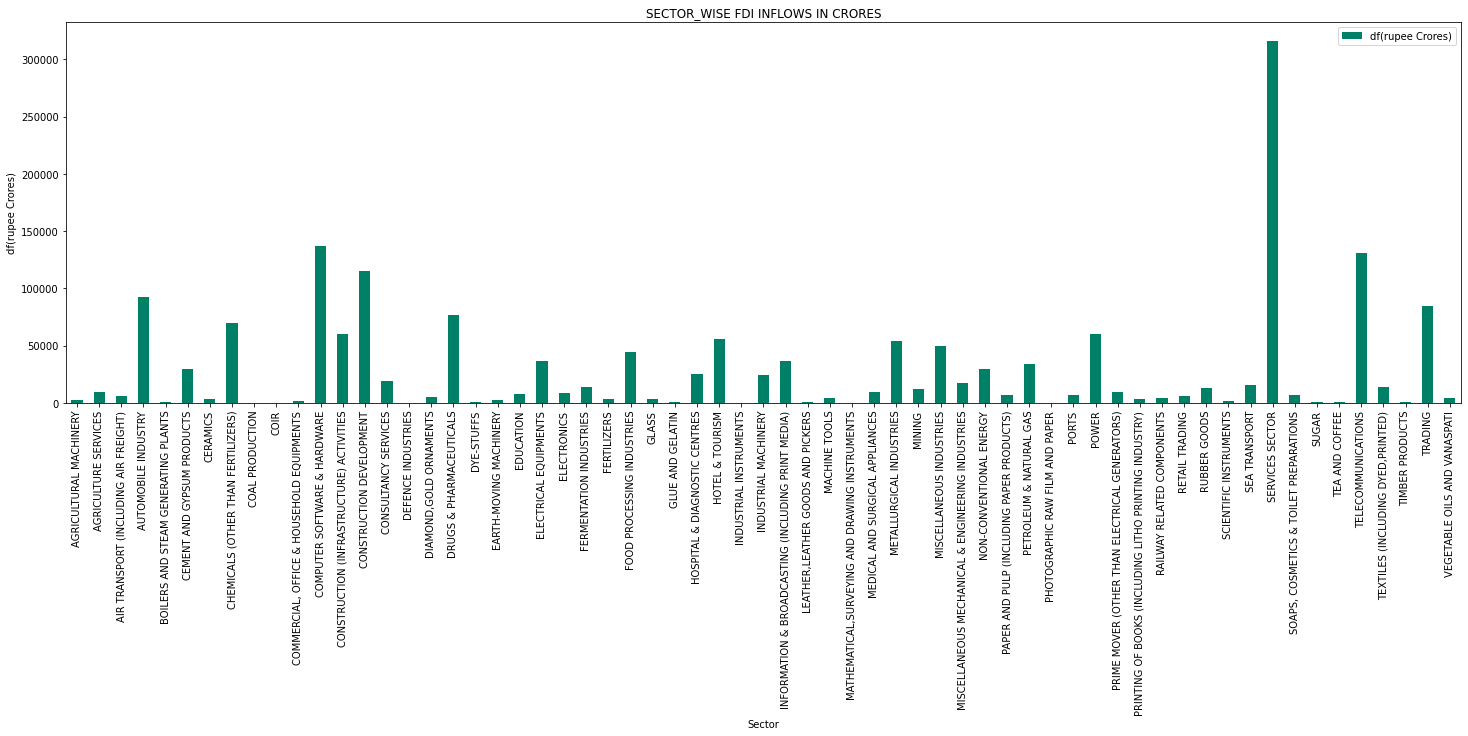

In [ ]:
Sectorwise_fdi.plot(kind='bar',y='df(rupee Crores)',figsize = (25,7), legend= True, title='SECTOR_WISE FDI INFLOWS IN CRORES',
                    ylabel='df(rupee Crores)',cmap='summer')
plt.show()

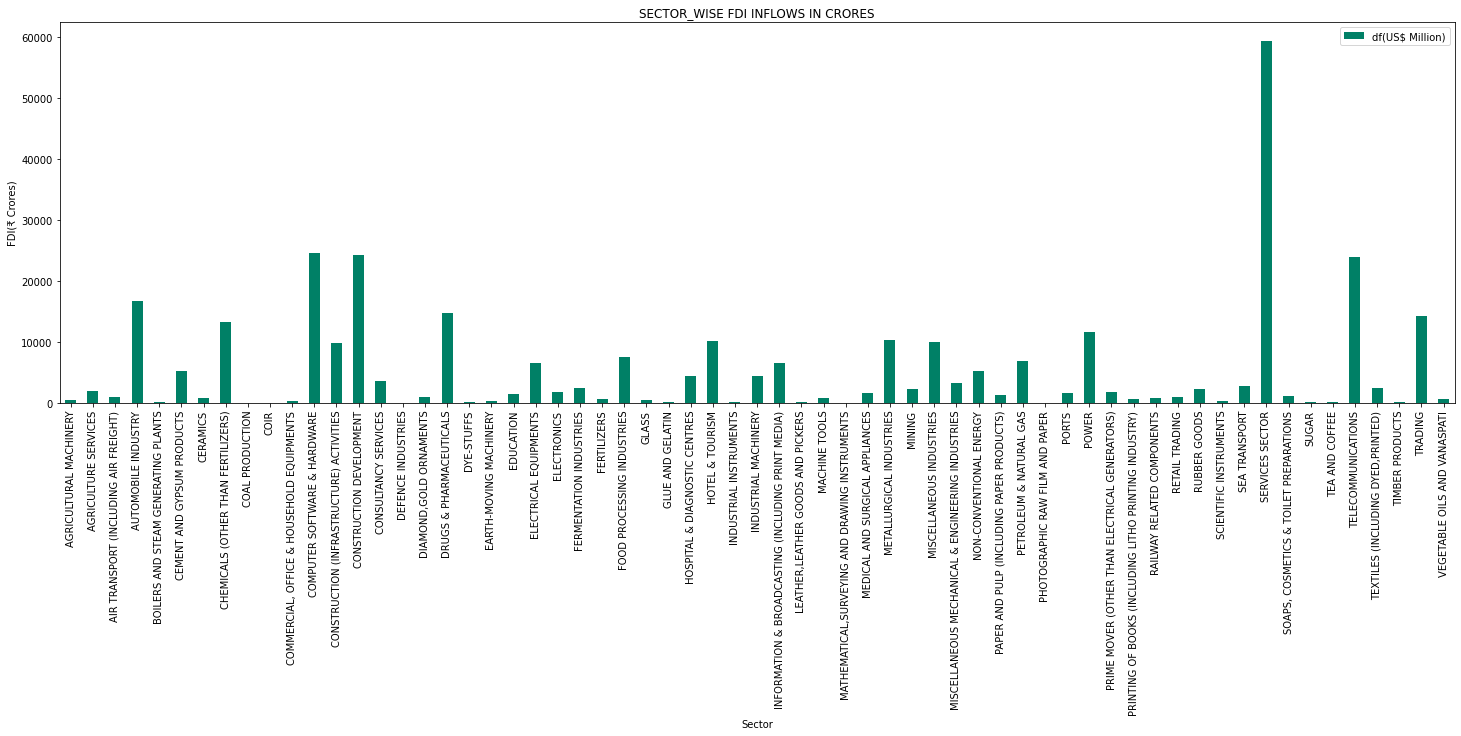

In [ ]:
Sectorwise_fdi.plot(kind='bar',y='df(US$ Million)',figsize = (25,7), legend= True, title='SECTOR_WISE FDI INFLOWS IN CRORES',ylabel='FDI(₹ Crores)',cmap='summer')
plt.show()

Best and Worst Performing Sectors

In [ ]:
Top_10_Sectors=Sectorwise_fdi.nlargest(10,['df(rupee Crores)'])

In [ ]:
Total_fdi = round(melt01['df(rupee Crores)'].sum(),2)
Sum = Top_10_Sectors['df(rupee Crores)'].sum()
Top_10_Sectors['In %age'] = round(Top_10_Sectors['df(rupee Crores)']/Sum*100,2) 
Top_10_Sectors['%age to Total Inflows'] = round((Top_10_Sectors['df(rupee Crores)']/Total_fdi)*100,2)
Top_10_Sectors

,df(rupee Crores),df(US$ Million),In %age,%age to Total Inflows
Sector,,,,
SERVICES SECTOR,316426.67,59476.49,27.66,17.65
COMPUTER SOFTWARE & HARDWARE,137296.48,24669.49,12.00,7.66
TELECOMMUNICATIONS,131001.76,23946.01,11.45,7.31
CONSTRUCTION DEVELOPMENT,115217.43,24293.09,10.07,6.43
AUTOMOBILE INDUSTRY,92637.98,16673.92,8.10,5.17
TRADING,84502.09,14210.88,7.39,4.71
DRUGS & PHARMACEUTICALS,76411.49,14706.90,6.68,4.26
CHEMICALS (OTHER THAN FERTILIZERS),70068.76,13293.09,6.12,3.91
POWER,60416.03,11589.13,5.28,3.37


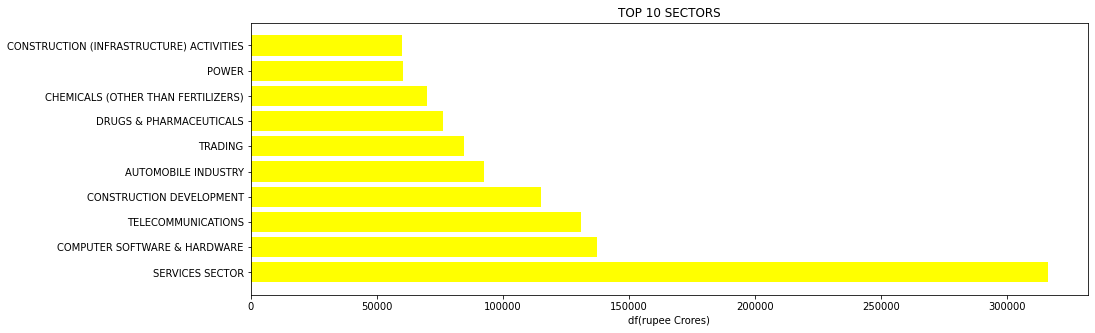

In [ ]:
plt.figure(figsize=(15,5))
plt.barh(Top_10_Sectors.index,Top_10_Sectors['df(rupee Crores)'],color='yellow')
plt.title('TOP 10 SECTORS')
plt.xlabel('df(rupee Crores)')
plt.show()

In [ ]:
Bottom_5_Sectors = Sectorwise_fdi.nsmallest(5,['df(rupee Crores)'])
Sum = Bottom_5_Sectors['df(rupee Crores)'].sum()
Bottom_5_Sectors['In %age'] = round(Bottom_5_Sectors['df(rupee Crores)']/Sum*100,2)
Bottom_5_Sectors['%age to Total Inflows'] = round((Bottom_5_Sectors['df(rupee Crores)']/Total_fdi)*100,3)
Bottom_5_Sectors

,df(rupee Crores),df(US$ Million),In %age,%age to Total Inflows
Sector,,,,
COIR,21.64,4.06,4.42,0.001
DEFENCE INDUSTRIES,26.12,5.12,5.33,0.001
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",41.62,7.98,8.50,0.002
COAL PRODUCTION,122.13,27.74,24.93,0.007
PHOTOGRAPHIC RAW FILM AND PAPER,278.37,67.28,56.82,0.016


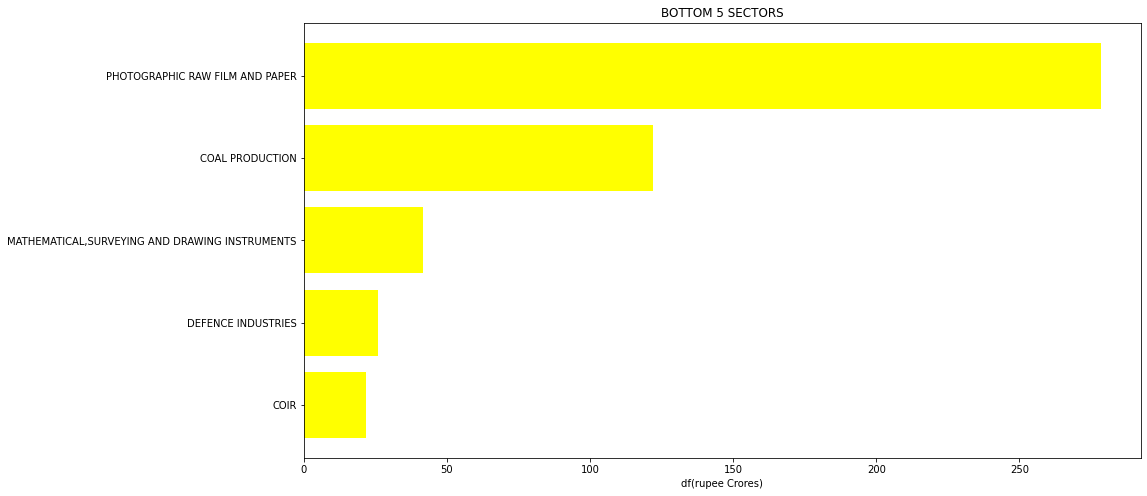

In [ ]:
plt.figure(figsize=(15,8))
plt.barh(Bottom_5_Sectors.index,Bottom_5_Sectors['df(rupee Crores)'],color = 'yellow')
plt.title('BOTTOM 5 SECTORS')
plt.xlabel('df(rupee Crores)')
plt.show()

Year-Wise Details

In [ ]:
melt02=melt01[['Year','df(rupee Crores)']]
melt02=round(melt02.groupby('Year').sum(),2)

In [ ]:
melt02['% growth over previous year']=round(melt02.pct_change()*100,2)

In [ ]:
print('\n'+"*"*8+"Details on Variation of FDI Inflow Year-wise"+'*'*8)
melt02.fillna('-')


********Details on Variation of FDI Inflow Year-wise********


,df(rupee Crores),% growth over previous year
Year,,
2000-01,10865.97,-
2001-02,19208.02,76.77
2002-03,13088.91,-31.86
2003-04,10053.15,-23.19
2004-05,14461.59,43.85
2005-06,24524.51,69.58
2006-07,56512.74,130.43
2007-08,98940.57,75.08
2008-09,144421.44,45.97


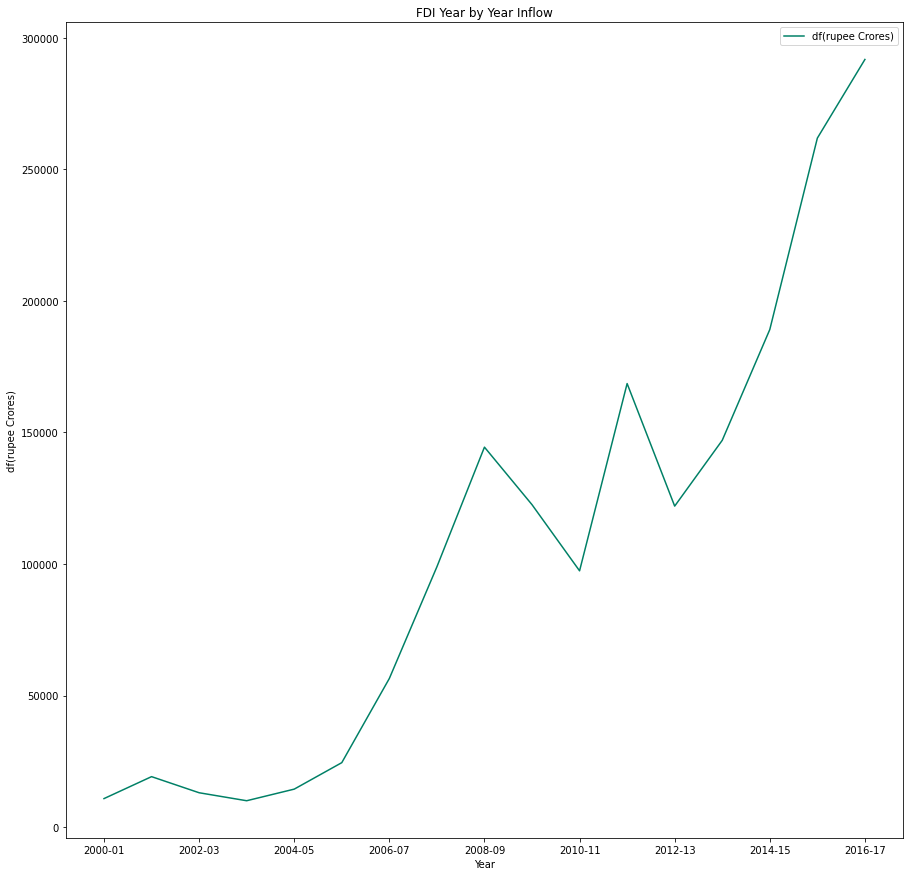

In [ ]:
melt02.plot.line(y='df(rupee Crores)',figsize=(15,15),cmap = 'summer')
plt.ylabel('df(rupee Crores)')
plt.title('FDI Year by Year Inflow')
plt.show()